# Debuggin Events and Systems

## Do they really rise with year?

In [1]:
%matplotlib notebook

In [48]:
# imports
from importlib import reload
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

from datetime import date

import pandas

import xarray
from dask.distributed import Client

from mhw_analysis.systems import io as mhw_sys_io


import analy_utils

# dask

In [3]:
client = Client(n_workers=8, threads_per_worker=2, memory_limit='10GB')
client

Client Scheduler: tcp://127.0.0.1:42857 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 16 Memory: 80.00 GB


# Load Cubes

In [4]:
std_file = '/home/xavier/Projects/Oceanography/MHW/db/MHWevent_cube.nc'
vary_file = '/home/xavier/Projects/Oceanography/MHW/db/MHWevent_cube_vary.nc'

In [5]:
std_cube = xarray.open_dataset(std_file)
std_cube

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 13879)
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2019-12-31
Data variables:
    events   (lat, lon, time) int8 ...

In [6]:
time = std_cube.time
time

<xarray.DataArray 'time' (time: 13879)>
array(['1982-01-01T00:00:00.000000000', '1982-01-02T00:00:00.000000000',
       '1982-01-03T00:00:00.000000000', ..., '2019-12-29T00:00:00.000000000',
       '2019-12-30T00:00:00.000000000', '2019-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2019-12-31

In [7]:
vary_cube = xarray.open_dataset(vary_file)

In [8]:
vary_cube

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 13879)
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2019-12-31
Data variables:
    events   (lat, lon, time) int8 ...

# Collapse

In [9]:
std_cube.events.shape

(720, 1440, 13879)

In [10]:
std_nevents_day = np.sum(std_cube.events > 0, axis=(0,1))

In [11]:
std_nevents_day.shape

(13879,)

In [12]:
vary_nevents_day = np.sum(vary_cube.events > 0, axis=(0,1))

## close em

In [18]:
std_cube.close()

In [19]:
vary_cube.close()

# Simple plot

In [14]:
dates = mpl.dates.date2num(time)

<IPython.core.display.Javascript object>


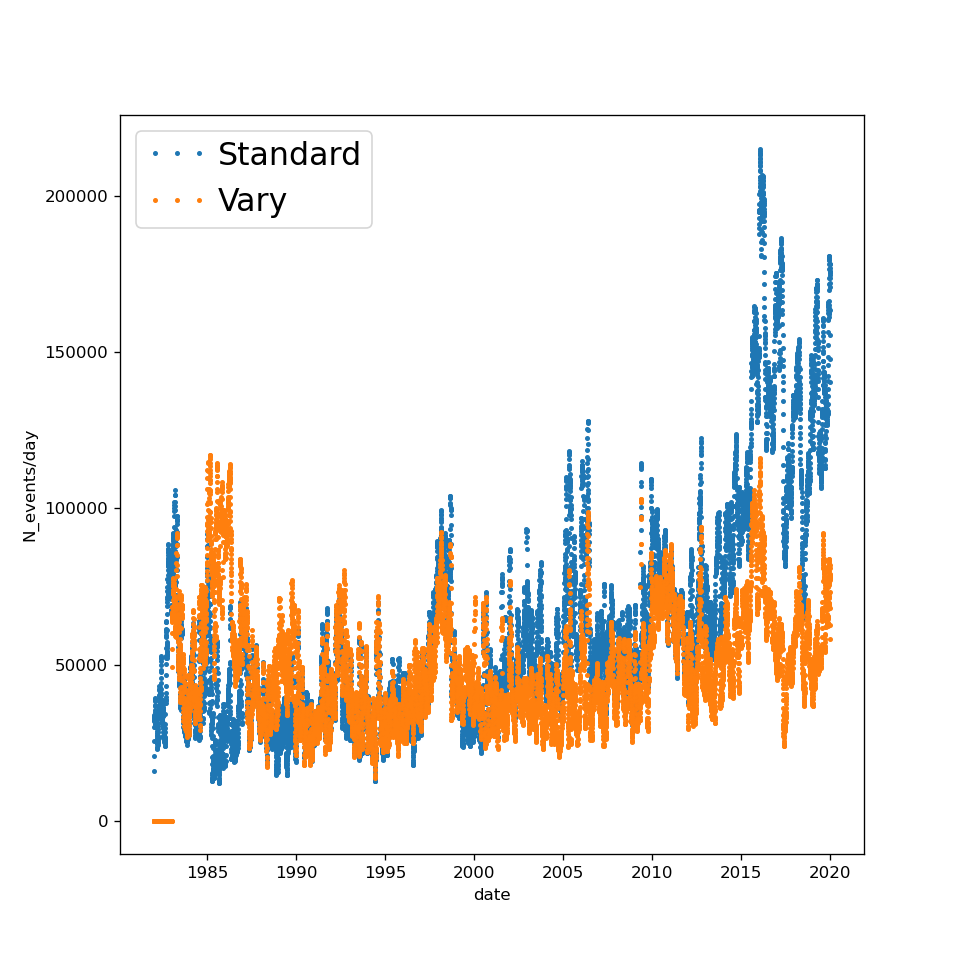

In [16]:
fig = plt.figure(figsize=(8, 8))
plt.clf()
ax = plt.gca()

# 
ax.plot_date(dates, std_nevents_day, label='Standard', ms=2)
ax.plot_date(dates, vary_nevents_day, label='Vary', ms=2)
#
ax.set_xlabel('date')
ax.set_ylabel('N_events/day')
#
legend = plt.legend(loc='upper left', scatterpoints=1, borderpad=0.3,
                        handletextpad=0.3, fontsize=19, numpoints=3)
#
plt.show()

# Mask

In [17]:
std_mask_file = '/home/xavier/Projects/Oceanography/MHW/db/MHWevent_cube.nc'

In [21]:
std_mask = xarray.open_dataset(std_mask_file)
std_mask

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 13879)
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2019-12-31
Data variables:
    events   (lat, lon, time) int8 ...

In [22]:
std_cube = std_mask.events > 0

In [23]:
std_cube.shape

(720, 1440, 13879)

In [24]:
std_nevents_day2 = np.sum(std_cube, axis=(0,1))

## Plot

<IPython.core.display.Javascript object>


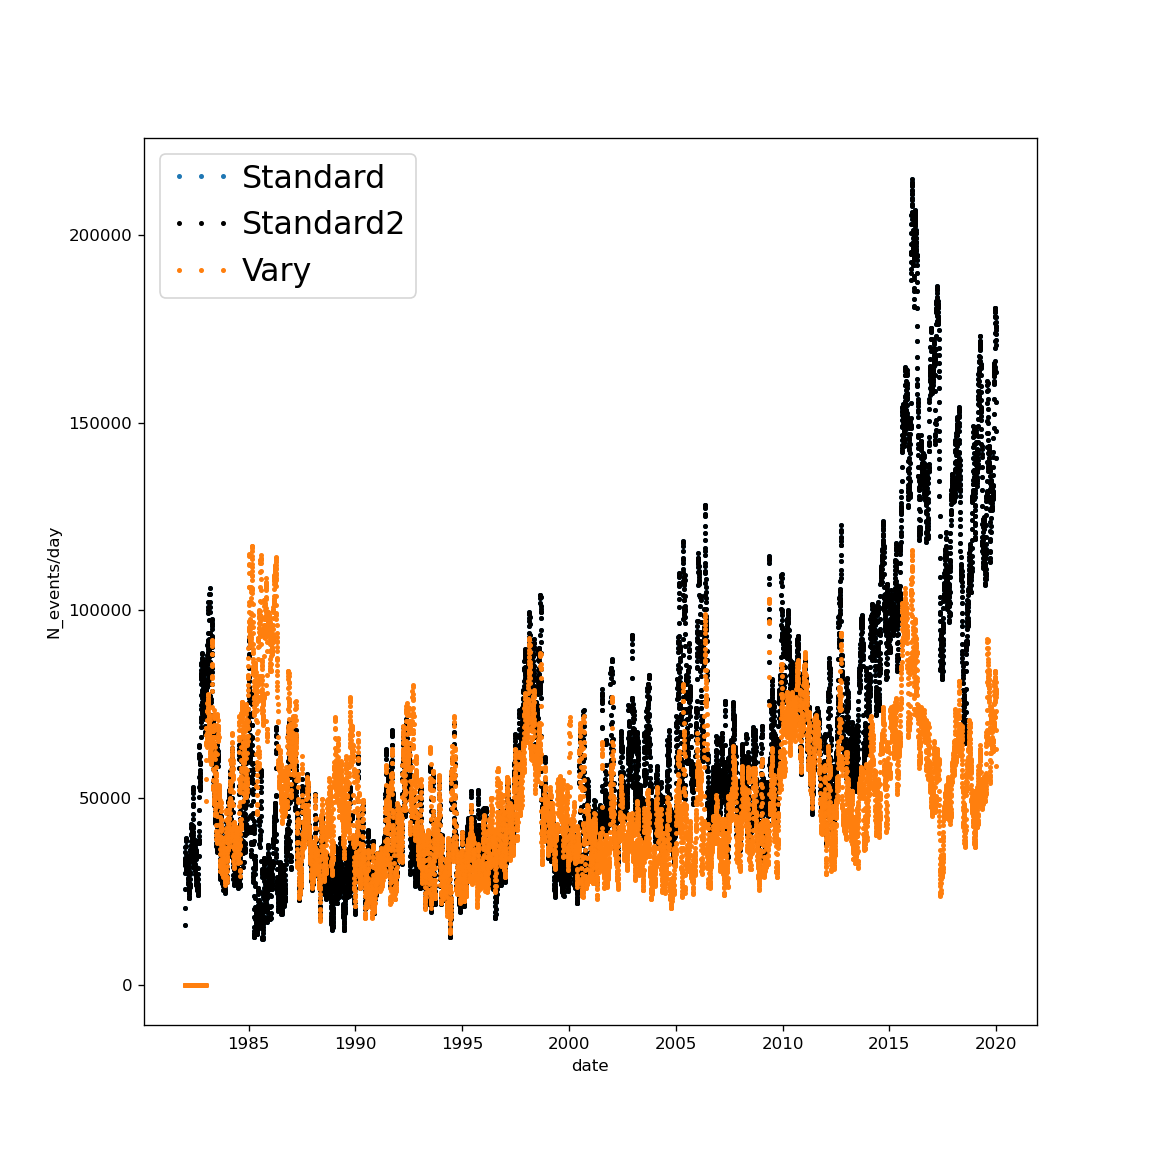

In [25]:
fig = plt.figure(figsize=(8, 8))
plt.clf()
ax = plt.gca()

# 
ax.plot_date(dates, std_nevents_day, label='Standard', ms=2)
ax.plot_date(dates, std_nevents_day2, label='Standard2', ms=2, color='k')

ax.plot_date(dates, vary_nevents_day, label='Vary', ms=2)
#
ax.set_xlabel('date')
ax.set_ylabel('N_events/day')
#
legend = plt.legend(loc='upper left', scatterpoints=1, borderpad=0.3,
                        handletextpad=0.3, fontsize=19, numpoints=3)
#
plt.show()

----

# MHW Systems

In [42]:
mhws_std_file = '/home/xavier/Projects/Oceanography/MHW/db/MHW_systems.csv'
mhws_std = mhw_sys_io.load_systems(mhw_sys_file=mhws_std_file)

Loading systems from /home/xavier/Projects/Oceanography/MHW/db/MHW_systems.csv
Done


In [43]:
mhws_std.head()

,Id,NVox,category,mask_Id,max_area,xcen,xboxmin,xboxmax,ycen,yboxmin,...,zcen,zboxmin,zboxmax,date,lat,lon,duration,datetime,startdate,enddate
0,1,1068,1,1,40,46.725655,46,50,671.51310,663,...,101.36142,68,132,1982-04-12,-78.193586,168.003281,65 days,1982-04-12,1982-03-09 15:19:33.312,1982-05-13 15:19:33.312
1,2,15708,1,2,1113,55.534250,46,72,686.00116,650,...,230.51031,156,329,1982-08-19,-75.991438,171.625290,174 days,1982-08-19,1982-06-05 11:45:09.216,1982-11-26 11:45:09.216
2,3,34,2,7,4,46.000000,46,46,664.08826,663,...,366.47058,362,373,1983-01-02,-78.375000,166.147064,12 days,1983-01-02,1982-12-28 12:42:21.888,1983-01-09 12:42:21.888
3,4,5387,1,8,206,52.832745,46,71,674.77610,651,...,472.55484,432,500,1983-04-18,-76.666814,168.819031,69 days,1983-04-18,1983-03-08 10:41:01.824,1983-05-16 10:41:01.824
4,5,24,1,10,4,46.000000,46,46,664.50000,663,...,571.50000,569,574,1983-07-26,-78.375000,166.250000,6 days,1983-07-26,1983-07-23 12:00:00.000,1983-07-29 12:00:00.000


In [52]:
mhws_std.iloc[0]

Id                                    1
NVox                               1068
category                              1
mask_Id                               1
max_area                             40
xcen                            46.7257
xboxmin                              46
xboxmax                              50
ycen                            671.513
yboxmin                             663
yboxmax                             681
zcen                            101.361
zboxmin                              68
zboxmax                             132
date                         1982-04-12
lat                            -78.1936
lon                             168.003
duration               65 days 00:00:00
datetime            1982-04-12 00:00:00
startdate    1982-03-09 15:19:33.312000
enddate      1982-05-13 15:19:33.312000
Name: 0, dtype: object

In [44]:
np.sum(mhws_std.NVox)

844724913

In [45]:
np.sum(std_nevents_day) - np.sum(mhws_std.NVox)

<xarray.DataArray 'events' ()>
array(1994782)

## Cut em up by year

In [57]:
reload(analy_utils)
pd_nvox = analy_utils.Nvox_by_year(mhws_std)

In [51]:
pd_nvox.head()

,small,intermediate,extreme
1983,941751,620032,-7
1984,967582,620970,-3184
1985,710007,413153,427
1986,687794,426067,156
1987,849017,430505,-1165
